## Mechanics solutions relating valve 'spring pressure' to parameter designs

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
# Import constants and equations from 2024 van Laake

# from paper
Ks = 2.9e10 # N/m
Kr = 3.6e5 # N*m/rad

# estimation of our system
b0 = 12e-3 # m
h0 = 8e-3 # m
x = np.linspace(-h0, 1e-3, 1000) # [h0]

# from paper
Av = np.pi*b0**2 # [b0]^2
ks_num = np.sqrt(h0**2 + b0**2) - np.sqrt(x**2 + b0**2)
ks_den = np.sqrt(x**2 + b0**2)
x_atan = [math.atan2(xx, b0) for xx in x]
kr_num = math.atan2(h0,b0)*np.ones(len(x_atan)) + x_atan
kr_den = b0*(x**2/b0**2 + 1)
Fs = -Ks*ks_num/ks_den*x + Kr*kr_num/kr_den
Ps = Fs/Av # N/mm^2

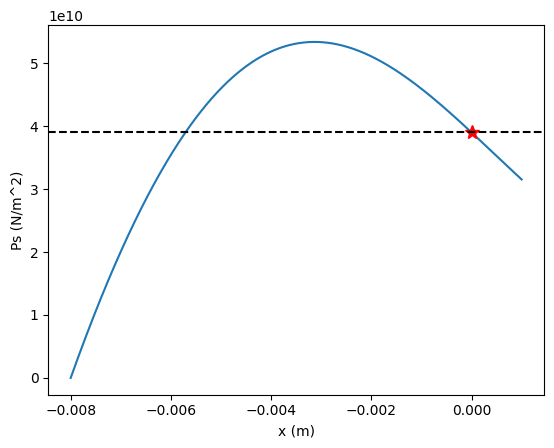

Ps(0) = [38993133.71062475] kPa


In [31]:
# plot x vs. Ps
plt.plot(x, Ps)
# star at x=0, horizontal line at Ps(0)
plt.plot(0, Ps[np.where(x==0)], 'r*', markersize=10)
plt.axhline(Ps[np.where(x==0)], color='k', linestyle='--')
plt.xlabel('x (m)')
plt.ylabel('Ps (N/m^2)')
plt.show()
print('Ps(0) =', Ps[np.where(x==0)]/1000, 'kPa') # N/m^2

### Try using our membrane simulation (altered for un-stretched state as a dome instead of flat)

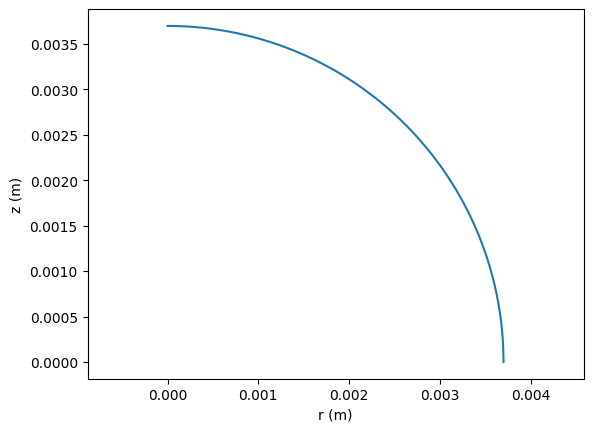

In [26]:
rf = b0 # [b0]
r = np.linspace(0, rf, 1000) # [b0]
# make z a dome (circle) with radius rf
z = np.sqrt(rf**2 - r**2) # [b0]

plt.plot(r, z)
# make the axes square
plt.axis('equal')
plt.xlabel('r (m)')
plt.ylabel('z (m)')
plt.show()

In [ ]:
# TODO - import membrane_simulation from 2025 Campbell et. al
# TODO - update membrane_simulation to deal with non-zero initial z, negative pressure, 0 value for r0, 0 value for F